Quetsion#1
Look for an image from the internet with the following properties: 8-bit gray-level, 
256x256 pixels in size.

1- Show this image.

Number of bits: 8
Image size: (256, 256)


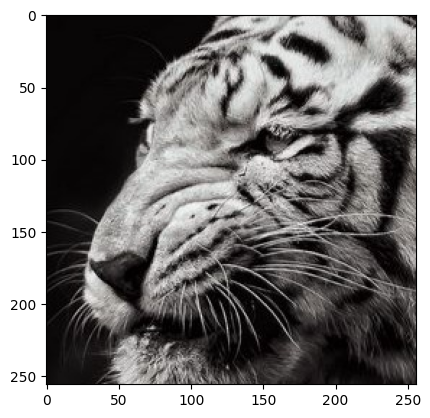

In [80]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('input_image.jpg')

# Display the image using Matplotlib
plt.imshow(image)

# Get the number of bits
num_bits = image.itemsize * 8

# Convert the image to grayscale 
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Get the size of the image
image_size = gray_image.shape

# Print the number of bits and the size of the image
print(f"Number of bits: {num_bits}")
print(f"Image size: {image_size}")


This code reads an image, displays it, and then prints its basic information like bit depth and size. Image.shape was used to get the size of the image if the shape is grayscale then there is no third value in the tuple (1 channel) but if it is a color image then there will be a third value in the tuple (3 channels) 


2- Apply a power law transformation with gamma=0.4 to the image and show the image after the transformation.

In [81]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_power_law_transformation(jpg_image_path, gamma_1, gamma_2):
    # Read the .jpg image (converted from .webp in the previous example)
    img = cv2.imread(jpg_image_path, cv2.IMREAD_GRAYSCALE)

    # Apply power law transformation with gamma = 0.4
    power_law_img_1 = np.power(img / 255.0, gamma_1) * 255.0
    power_law_img_1 = np.uint8(power_law_img_1)

    # Apply power law transformation with gamma > 1
    power_law_img_2 = np.power(img / 255.0, gamma_2) * 255.0
    power_law_img_2 = np.uint8(power_law_img_2)

    # Display the original and transformed images side by side
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(power_law_img_1, cmap='gray')
    plt.title(f'Power Law Transformation (Gamma={gamma_1})')

    plt.subplot(1, 3, 3)
    plt.imshow(power_law_img_2, cmap='gray')
    plt.title(f'Power Law Transformation (Gamma={gamma_2})')

    plt.show()


The gamma value in power law transformation affects the image contrast.
When gamma is less than 1, it enhances the contrast of darker regions in the image, making them appear brighter.
This is because raising pixel values to a power less than 1 amplifies the lower intensity values, resulting in brighter regions.
On the other hand, when gamma is greater than 1, it enhances the contrast of brighter regions in the image, making them appear darker.
This is because raising pixel values to a power greater than 1 amplifies the higher intensity values, resulting in darker regions.

γ<1: Dark areas are enhanced, and bright areas are subdued, useful for enhancing details in shadows.

γ>1: Dark areas are subdued, and bright areas are enhanced, useful for correcting overexposed or washed-out images.

3- Add a zero-mean Gaussian noise (with variance =40 gray-levels) to the 
original image and show the resulting image.

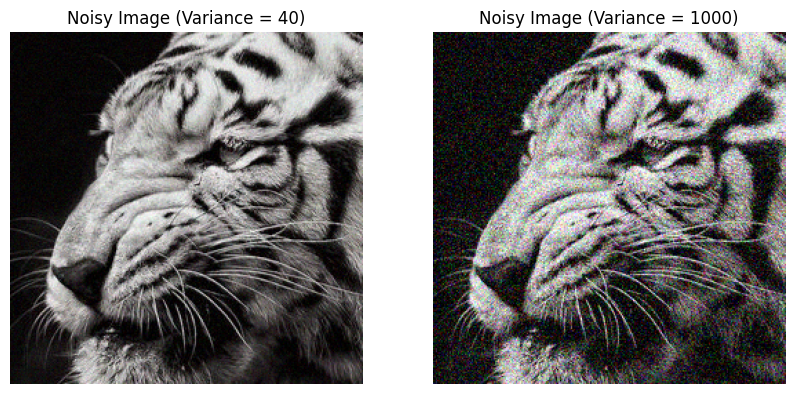

In [82]:
img_array = np.array(image)

# Add zero-mean Gaussian noise to the original image with variance 40
variance_1 = 40
noise_1 = np.random.normal(0, np.sqrt(variance_1), img_array.shape)
noisy_img = img_array + noise_1

# Add zero-mean Gaussian noise to the original image with variance 1000
variance_2 = 1000
noise_2 = np.random.normal(0, np.sqrt(variance_2), img_array.shape)
noisy_img_2 = img_array + noise_2

# Clip the pixel values to the valid range [0, 255]
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
noisy_img_2 = np.clip(noisy_img_2, 0, 255).astype(np.uint8)

# Display the resulting images using plt
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(noisy_img)
plt.title(f"Noisy Image (Variance = {variance_1})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_img_2)
plt.title(f"Noisy Image (Variance = {variance_2})")
plt.axis('off')

plt.show()


In general, this code corrupts the original image with controlled noise, saves it as a new file, and finally displays the noisy version for further analysis or processing.

Adding Noise:

variance = 40: Defines the intensity of the noise. Higher values lead to stronger noise.

np.random.normal: Generates random values from a zero-mean Gaussian distribution with the specified variance.

noisy_img = img_array + noise: Adds the noise to the original image.

Clipping Values:

np.clip: Ensures all pixel values remain within the valid range for images (0-255).

np.uint8: Converts the values to the data type used for image pixels.

The variance of Gaussian noise in an image can be controlled by varying values. A smaller variance (e.g., 40) results in less spread, resulting in a subtle noise pattern. A larger variance (e.g., 1000) results in a wider spread, causing a more noticeable noise pattern and stronger visual impact. The choice of variance depends on the desired level of noise, with smaller variances suitable for subtle noise effects and larger variances for artistic or exaggerated effects.

4- Apply a 5 by 5 mean filter to the noisy-image you obtained in point 3 above
and show the result.

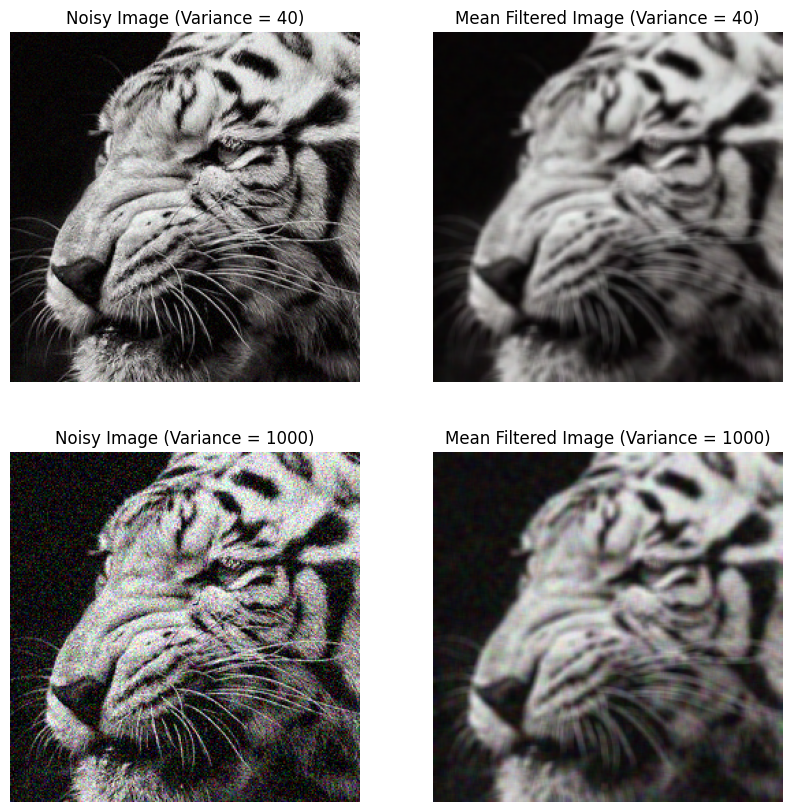

In [83]:
# Apply a 5x5 mean filter to the noisy image
mean_filtered_img = cv2.blur(noisy_img, (5, 5))
mean_filtered_img_2 = cv2.blur(noisy_img_2, (5, 5))

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(noisy_img)
plt.title(f"Noisy Image (Variance = {variance_1})")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mean_filtered_img)
plt.title(f"Mean Filtered Image (Variance = {variance_1})")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(noisy_img_2)
plt.title(f"Noisy Image (Variance = {variance_2})")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(mean_filtered_img_2)
plt.title(f"Mean Filtered Image (Variance = {variance_2})")
plt.axis('off')

plt.show()


Overall, the code filters the noisy image using a 5x5 mean filter and uses Matplotlib to show the mean-filtered output. By averaging nearby pixel values, the mean filter reduces noise and highlights specific characteristics while also smoothing the image. The application of a 5x5 mean filter to the noisy image is expected to reduce noise but at the cost of some blurring. The trade-off between noise reduction and detail preservation should be considered based on the specific goals of image processing in a given application.

5- Add salt and pepper noise (noise-density=0.1) to the original image and then 
apply a 7 by 7 median filter to the noisy-image and show both images.

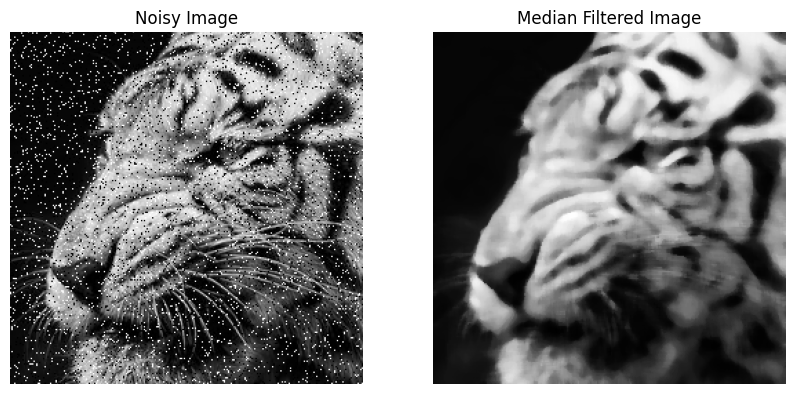

In [84]:
# Load the original image
original_image_path = "input_image.jpg"
original_image = cv2.imread(original_image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Add salt and pepper noise to the grayscale image
noise_density = 0.1
noisy_image = np.copy(gray_image)
salt_pepper = np.random.rand(*gray_image.shape)
noisy_image[salt_pepper < noise_density / 2] = 0
noisy_image[salt_pepper > 1 - noise_density / 2] = 255

# Apply a median filter to the noisy image
median_filtered_image = cv2.medianBlur(noisy_image, 7)

# Display the noisy image and the median filtered image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(noisy_image, cmap='gray')
axes[0].set_title('Noisy Image')
axes[0].axis('off')
axes[1].imshow(median_filtered_image, cmap='gray')
axes[1].set_title('Median Filtered Image')
axes[1].axis('off')
plt.show()


The code snippet creates a noisy image by adding salt-and-pepper noise to the grayscale version of the original image. The noise density is set to 0.1, affecting 10% of the pixels. A median filter is applied to the noisy image using cv2.medianBlur, removing salt-and-pepper noise while preserving edges and fine details. The output shows a "Noisy Image" with random black and white speckles, while the "Median Filtered Image" is smoother and less distorted. The code uses matplotlib to display the two images side by side in a 1x2 subplot.

6- Apply a 7 by 7 mean filter to the salt and pepper noisy-image and show the 
result. Discuss the results in your report.

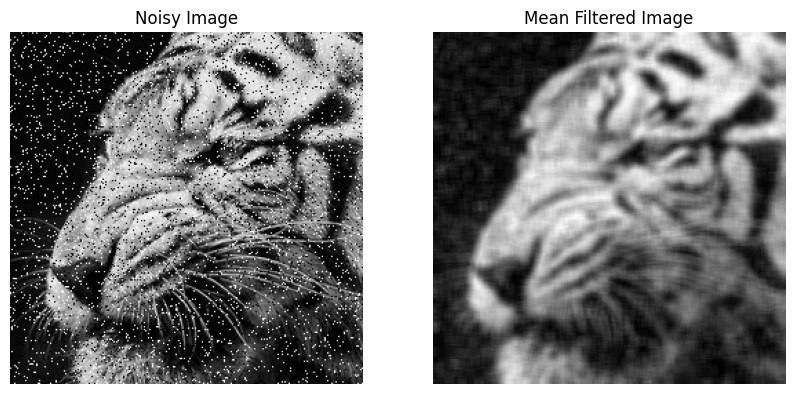

In [85]:
# Apply a 7x7 mean filter to the salt and pepper noisy image
mean_filtered_image = cv2.blur(noisy_image, (7, 7))

# Save the mean filtered image
mean_filtered_image_path = "mean_filtered_image.jpg"
cv2.imwrite(mean_filtered_image_path, mean_filtered_image)

# Display the noisy image and the mean filtered image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(noisy_image, cmap='gray')
axes[0].set_title('Noisy Image')
axes[0].axis('off')
axes[1].imshow(mean_filtered_image, cmap='gray')
axes[1].set_title('Mean Filtered Image')
axes[1].axis('off')
plt.show()



The code uses a 7x7 mean filter to reduce noise in a salt-and-pepper noisy image. The filter calculates the average intensity of pixels in a 7x7 neighborhood for each pixel. It reduces noise but blurs edges and fine details. The "Mean Filtered Image" appears smoother but may introduce blurring and less sharp edges compared to the median filter. The code displays the results in a 1x2 subplot using matplotlib. The output visually demonstrates the effect of the filter.

Mean and median filters are commonly used in image processing for noise reduction, especially in the presence of salt-and-pepper noise. Mean filters replace pixel values with the average intensities in a local neighborhood, effectively reducing salt-and-pepper noise. However, they can blur edges and fine details, especially when the filter size is large. On the other hand, median filters replace pixel values with the median value, making them more effective in removing salt-and-pepper noise. They preserve edges and fine details better than mean filters and are less sensitive to outliers and extreme values. The choice between mean and median filters involves a trade-off between noise reduction and image detail preservation.

7- Apply a Sobel filter to the original image and show the response (don’t use 
ready functions to do this part).

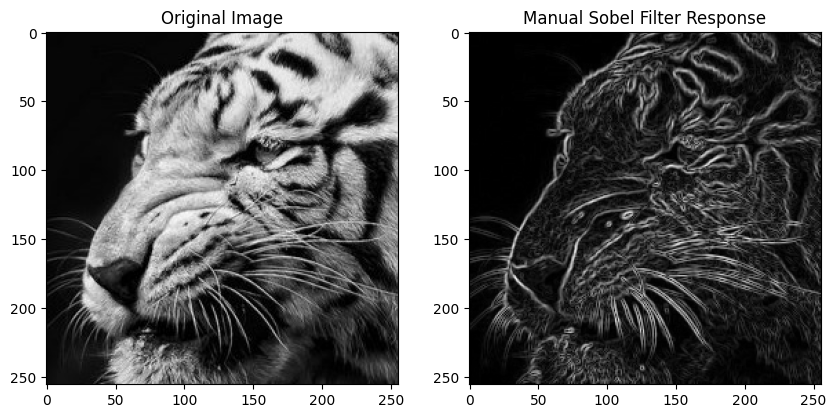

In [86]:
img = cv2.imread('input_image.jpg', cv2.IMREAD_GRAYSCALE)

# Convert image to float64 for precision
img_float64 = img.astype(np.float64)

# Define the Sobel filter kernels
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Apply Sobel filter using cv2.filter2D
sobel_x = cv2.filter2D(img_float64, cv2.CV_64F, sobel_kernel_x)
sobel_y = cv2.filter2D(img_float64, cv2.CV_64F, sobel_kernel_y)

# Combine the Sobel responses to get the final output
sobel_result = np.sqrt(sobel_x**2 + sobel_y**2)

# Scale the result to fit in the range [0, 255]
sobel_result = np.uint8(255 * sobel_result / np.max(sobel_result))

# Display the original image and the Sobel response
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sobel_result, cmap='gray')
plt.title('Manual Sobel Filter Response')

plt.show()


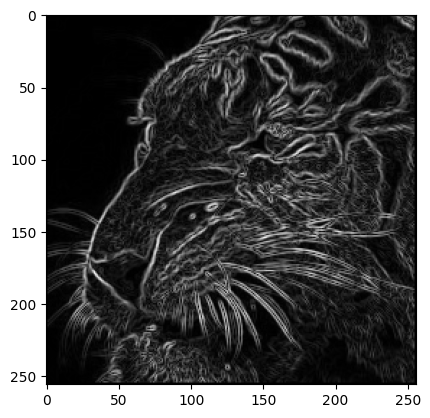

In [87]:
# another way to do it
image_file = './input_image.jpg'
input_image = cv2.imread(image_file)

# Convert the input image to grayscale
grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Sobel filtering
Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

rows, columns = grayscale_image.shape
sobel_filtered_image = np.zeros(shape=(rows, columns))

for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))  # x direction
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3]))  # y direction
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  # calculate the "hypotenuse"

# Display the Sobel filtered image
plt.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))
plt.show()

A Sobel filter is a convolution filter used in image processing for edge detection. It calculates the gradient of an image by highlighting areas with rapid intensity changes. It consists of two kernels for horizontal and vertical changes. The filter highlights edges and boundaries, aiding in tasks like edge detection, feature extraction, and image analysis.

This code reads a grayscale image, converts it to float64 for precision, applies Sobel filters in both x and y directions, and then combines the responses to obtain the final Sobel filter output. The result is scaled to fit the range [0, 255] and displayed side by side using Matplotlib. The code defines Sobel filter kernels for both x and y directions, applies Sobel filters using cv2.filter2D to compute gradients in both directions, and then calculates the final output by combining the Sobel responses. The result is then scaled to fit the range [0, 255]. The code then displays the original image and the Sobel filter response side by side using Matplotlib. This code demonstrates the manual application of Sobel filters to compute image gradients and displays the original image alongside the Sobel filter response for visual comparison.

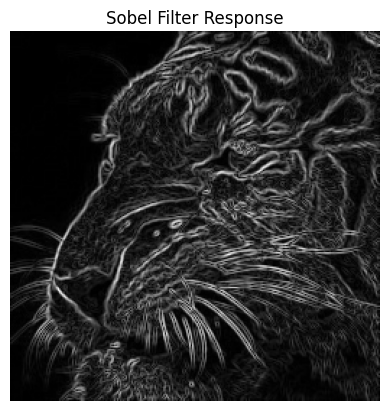

In [88]:
# using the ready function from opencv to verify the result
original_image = cv2.imread(original_image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply the Sobel filter to the grayscale image
gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude of the gradients
gradient_magnitude = cv2.magnitude(gradient_x, gradient_y)

# Normalize the gradient magnitude to the range [0, 255]
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Display the response of the Sobel filter
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Sobel Filter Response')
plt.axis('off')
plt.show()


Quetsion#2 
Write a function that convolves an image with a given convolution filter
function [input_image]= myImageFilter( Input_image, filter) 
Your function should output image of the same size as that of input Image (use padding). 
Test your function (on attached images “House1.jpg” and “House2.jpg”) and show 
results on the following Kernels.

1- Averaging Kernel (3×3 and 5×5 ) 

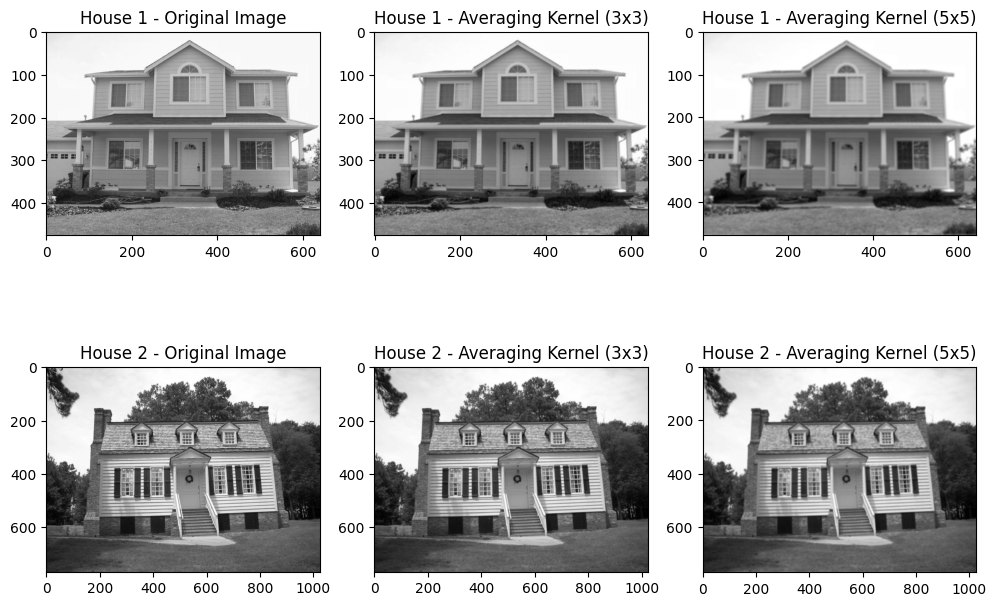

In [89]:
def myImageFilter(input_image, filter):
    # Ensure the input image is of type float64
    input_image = input_image.astype(np.float64)
    
    # Get the filter size
    filter_size = filter.shape[0]
    
    # Calculate the padding size based on the filter size
    pad_size = filter_size // 5
    
    # Pad the input image
    padded_image = np.pad(input_image, ((pad_size, pad_size), (pad_size, pad_size)), mode='mean')
    
    # Perform convolution
    output_image = cv2.filter2D(padded_image, cv2.CV_64F, filter)
    
    return output_image


# Read the images
house1 = cv2.imread("./A1/House1.jpg", cv2.IMREAD_GRAYSCALE)
house2 = cv2.imread("./A1/House2.jpg", cv2.IMREAD_GRAYSCALE)

# Define filters
average_3x3 = np.ones((3, 3), dtype=np.float32) / 9
average_5x5 = np.ones((5, 5), dtype=np.float32) / 25

# Test the function with different filters
result_avg_3x3_house1 = myImageFilter(house1, average_3x3)
result_avg_5x5_house1 = myImageFilter(house1, average_5x5)
result_avg_3x3_house2 = myImageFilter(house2, average_3x3)
result_avg_5x5_house2 = myImageFilter(house2, average_5x5)

# Display results for Averaging Kernels
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(house1, cmap='gray')
plt.title('House 1 - Original Image')

plt.subplot(2, 3, 2)
plt.imshow(result_avg_3x3_house1, cmap='gray')
plt.title('House 1 - Averaging Kernel (3x3)')

plt.subplot(2, 3, 3)
plt.imshow(result_avg_5x5_house1, cmap='gray')
plt.title('House 1 - Averaging Kernel (5x5)')

plt.subplot(2, 3, 4)
plt.imshow(house2, cmap='gray')
plt.title('House 2 - Original Image')

plt.subplot(2, 3, 5)
plt.imshow(result_avg_3x3_house2, cmap='gray')
plt.title('House 2 - Averaging Kernel (3x3)')

plt.subplot(2, 3, 6)
plt.imshow(result_avg_5x5_house2, cmap='gray')
plt.title('House 2 - Averaging Kernel (5x5)')

plt.show()


The `myImageFilter` function is a tool that performs convolution on an input image using a specified convolution filter. It is tested with averaging kernels of different sizes (3x3 and 5x5) on two house images. The function converts the input image to float64 for precision and ensures the required padding size. The convolution is performed using `cv2.filter2D` with the specified filter, which calculates the weighted sum of pixel values at each position. Averaging kernels, such as `average_3x3` and `average_5x5`, are commonly used for image smoothing or blurring. The larger the size of the averaging kernel, the stronger the smoothing effect. The original grayscale images of House 1 and House 2 are displayed alongside the results of convolution with 3x3 and 5x5 averaging kernels. The choice of kernel size depends on the desired level of smoothing and the specific requirements of the task.

2- Gaussian Kernel (σ = 1,2,3 ) Use (2σ +1)×(2σ +1) as size of Kernel (You may write a separate function to generate Gaussian Kernels for different values of σ).

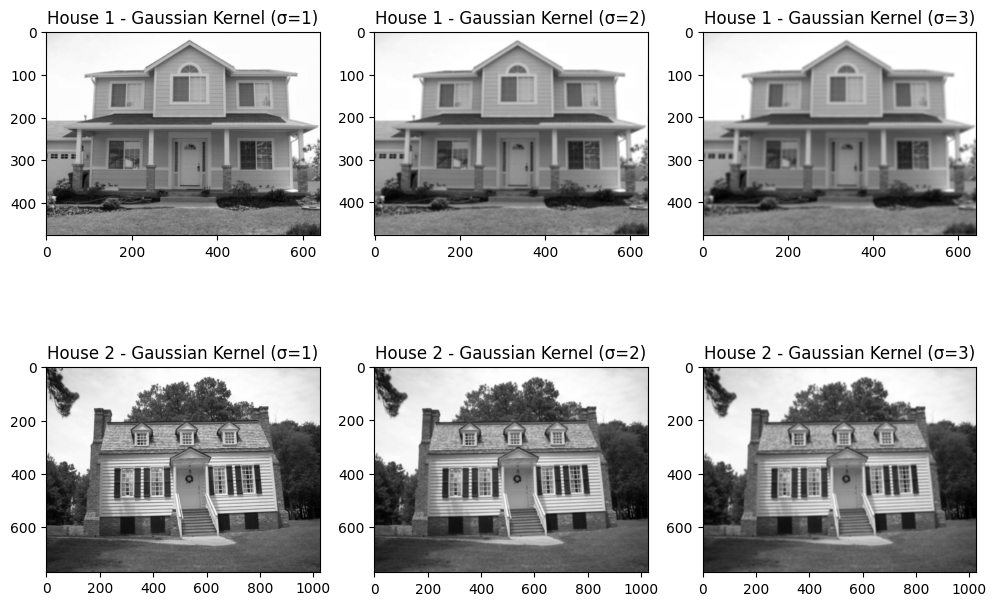

In [90]:
def generateGaussianKernel(sigma):
    size = int(2 * sigma + 1)
    kernel = np.fromfunction(lambda x, y: (1/ (2 * np.pi * sigma ** 2)) * np.exp(-((x - sigma) ** 2 + (y - sigma) ** 2) / (2 * sigma ** 2)), (size, size))
    return kernel / np.sum(kernel)

# Define Gaussian Kernels with different sigmas
sigma_values = [1, 2, 3]
gaussian_kernels = [generateGaussianKernel(sigma) for sigma in sigma_values]

# Test the function with Gaussian Kernels
plt.figure(figsize=(12, 8))

# Row 1: House 1
for i, sigma in enumerate(sigma_values):
    result_gaussian_house1 = myImageFilter(house1, gaussian_kernels[i])
    
    plt.subplot(2, 3, i+1)
    plt.imshow(result_gaussian_house1, cmap='gray')
    plt.title(f'House 1 - Gaussian Kernel (σ={sigma})')

# Row 2: House 2
for i, sigma in enumerate(sigma_values):
    result_gaussian_house2 = myImageFilter(house2, gaussian_kernels[i])
    
    plt.subplot(2, 3, i+4)
    plt.imshow(result_gaussian_house2, cmap='gray')
    plt.title(f'House 2 - Gaussian Kernel (σ={sigma})')

plt.show()


The code uses the myImageFilter function to apply Gaussian kernels with different standard deviations (sigmas) to House 1 and House 2 images. The generateGaussianKernel function generates a 2D Gaussian kernel based on a given sigma value, with the size determined by 2×sigma+1. Gaussian kernels are commonly used for blurring or smoothing images, with larger sigma values resulting in a more significant smoothing effect. The code displays the results in a 2x3 grid, with each row representing an image and each column representing a different sigma value. The choice of sigma depends on the desired level of blurring and image characteristics. Gaussian kernels are particularly useful for reducing noise and achieving a more visually pleasing appearance in images.

3- Sobel Edge Operators: 

    [-1 -2 -1]       [-1  0   1]
    [ 0  0  0] and   [-2  0   2]
    [ 1  2  1]       [-1  0   1]


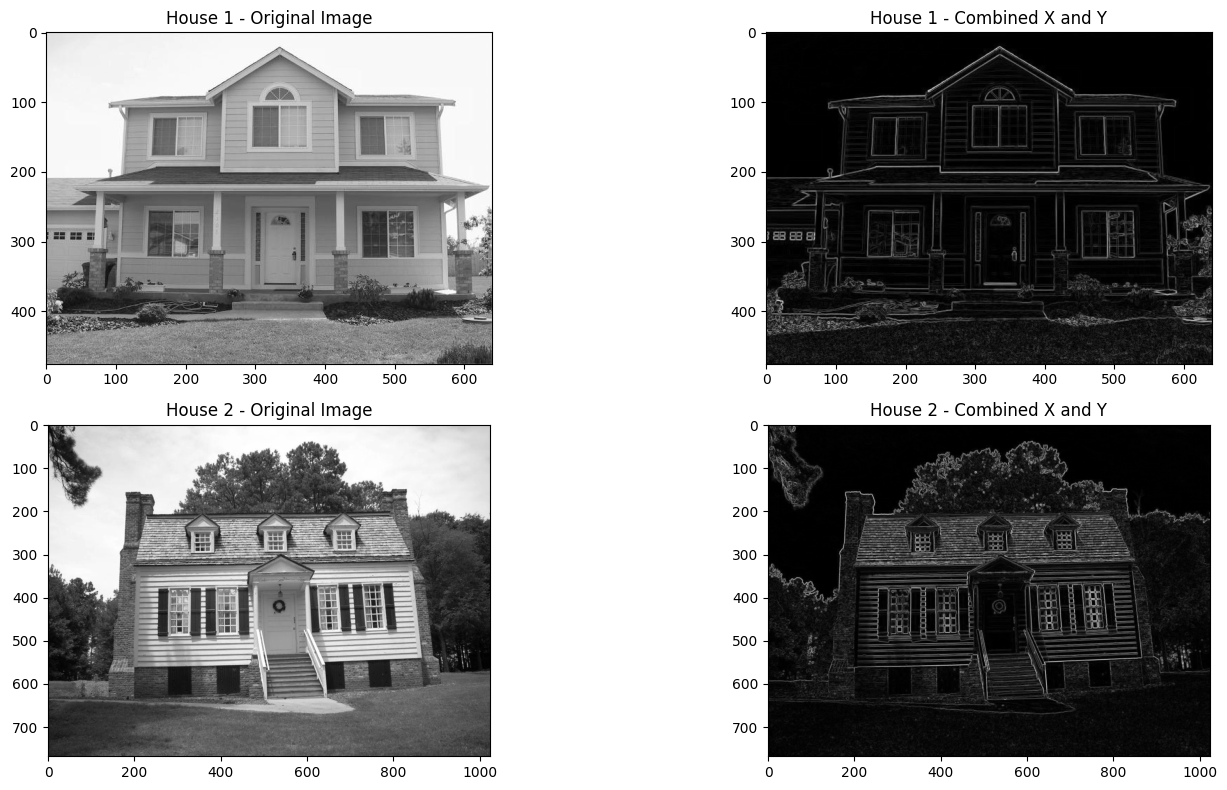

In [91]:
# Sobel edge operators
sobel_x_operator = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y_operator = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Test the function with Sobel Edge Operators
result_sobel_x_house1 = myImageFilter(house1, sobel_x_operator)
result_sobel_y_house1 = myImageFilter(house1, sobel_y_operator)
result_sobel_x_house2 = myImageFilter(house2, sobel_x_operator)
result_sobel_y_house2 = myImageFilter(house2, sobel_y_operator)

# Compute gradient magnitude and orientation for both houses
gradient_magnitude_house1 = np.sqrt(np.square(result_sobel_x_house1) + np.square(result_sobel_y_house1))
gradient_orientation_house1 = np.arctan2(result_sobel_y_house1, result_sobel_x_house1)

gradient_magnitude_house2 = np.sqrt(np.square(result_sobel_x_house2) + np.square(result_sobel_y_house2))
gradient_orientation_house2 = np.arctan2(result_sobel_y_house2, result_sobel_x_house2)

# Display results for Sobel Edge Operators
plt.figure(figsize=(16, 8))

# House 1
plt.subplot(2, 2, 1)
plt.imshow(house1, cmap='gray')
plt.title('House 1 - Original Image')

plt.subplot(2, 2, 2)
plt.imshow(gradient_magnitude_house1, cmap='gray')
plt.title('House 1 - Combined X and Y')

# House 2
plt.subplot(2, 2, 3)
plt.imshow(house2, cmap='gray')
plt.title('House 2 - Original Image')

plt.subplot(2, 2, 4)
plt.imshow(gradient_magnitude_house2, cmap='gray')
plt.title('House 2 - Combined X and Y')

plt.tight_layout()
plt.show()



The code uses the myImageFilter function to apply Sobel edge operators to House 1 and House 2 images, focusing on horizontal and vertical edges. The gradient magnitude and orientation are computed separately for visualization. Sobel X and Sobel Y operators are applied separately to both images, with gradient magnitude calculated using the square root of the sum of squared gradients and orientation calculated using the arctangent of the ratio of Sobel Y to Sobel X. The results are displayed in a 2x4 grid, with columns representing the original image, Sobel X operator result, Sobel Y operator result, and combined gradient magnitude. The combined gradient magnitude provides a comprehensive view of edges in both directions, with dark regions indicating low gradients and bright regions indicating edges.

The function is tested with the Sobel Edge Operators, and the results are displayed side by side using Matplotlib. The code demonstrates the application of Sobel edge operators to detect horizontal and vertical edges in grayscale images and visualizes the results for comparison. The results are displayed in a plot, allowing for easy comparison and comparison of the results. The code demonstrates the effectiveness of Sobel edge operators in detecting horizontal and vertical edges in grayscale images.



4- Prewitt Edge Operators: 

    [-1  0 -1]       [1  1   1]
    [-1  0  0] and   [0  0   0]
    [-1  0  1]       [-1  -1   1]


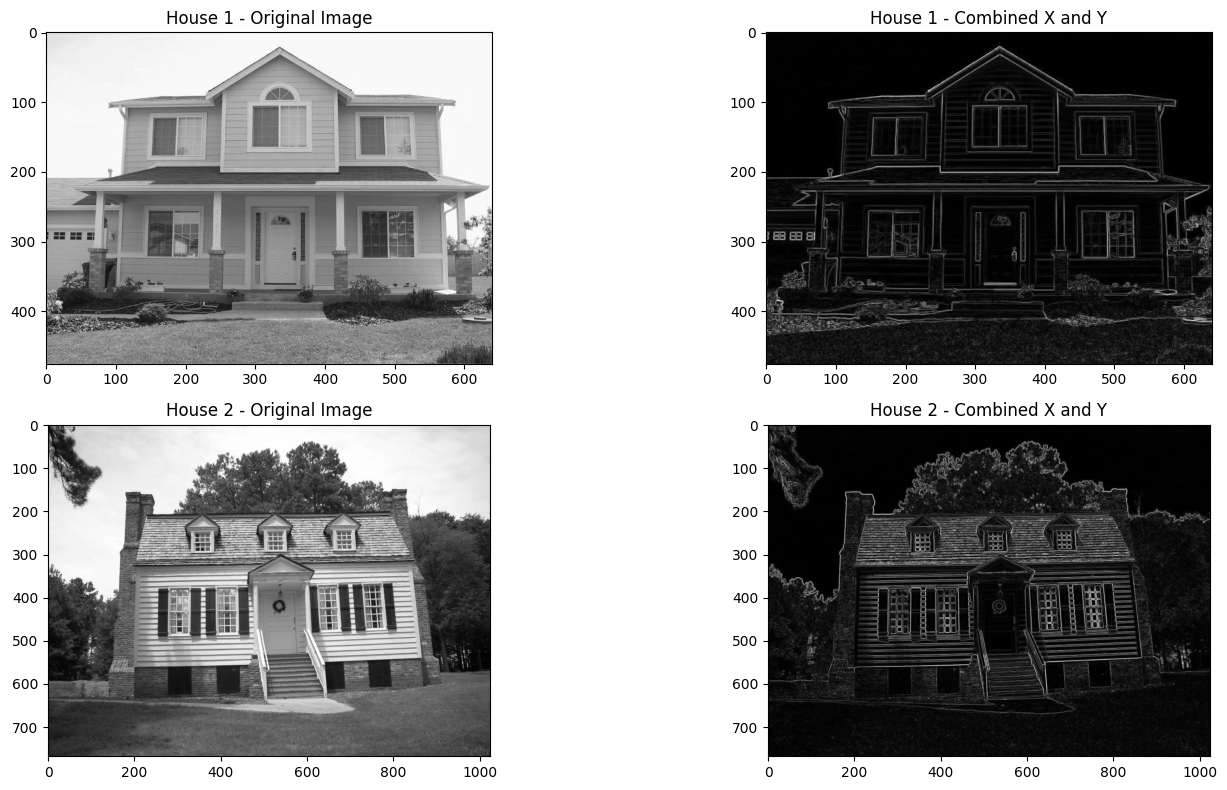

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Prewitt edge operators
prewitt_x_operator = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y_operator = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Test the function with Prewitt Edge Operators
result_prewitt_x_house1 = myImageFilter(house1, prewitt_x_operator)
result_prewitt_y_house1 = myImageFilter(house1, prewitt_y_operator)
result_prewitt_x_house2 = myImageFilter(house2, prewitt_x_operator)
result_prewitt_y_house2 = myImageFilter(house2, prewitt_y_operator)

# Compute gradient magnitude and orientation for both houses
gradient_magnitude_prewitt_house1 = np.sqrt(np.square(result_prewitt_x_house1) + np.square(result_prewitt_y_house1)) # gradient magnitude = sqrt(gx^2 + gy^2)
gradient_orientation_prewitt_house1 = np.arctan2(result_prewitt_y_house1, result_prewitt_x_house1)

gradient_magnitude_prewitt_house2 = np.sqrt(np.square(result_prewitt_x_house2) + np.square(result_prewitt_y_house2))
gradient_orientation_prewitt_house2 = np.arctan2(result_prewitt_y_house2, result_prewitt_x_house2)

# Display results for Prewitt Edge Operators
plt.figure(figsize=(16, 8))

# House 1
plt.subplot(2, 2, 1)
plt.imshow(house1, cmap='gray')
plt.title('House 1 - Original Image')

plt.subplot(2, 2, 2)
plt.imshow(gradient_magnitude_prewitt_house1, cmap='gray')
plt.title('House 1 - Combined X and Y')

# House 2
plt.subplot(2, 2, 3)
plt.imshow(house2, cmap='gray')
plt.title('House 2 - Original Image')

plt.subplot(2, 2, 4)
plt.imshow(gradient_magnitude_prewitt_house2, cmap='gray')
plt.title('House 2 - Combined X and Y')

plt.tight_layout()
plt.show()



The code uses Prewitt edge operators to detect horizontal and vertical edges in House 1 and House 2 images using the myImageFilter function. The gradient magnitude and orientation are computed separately for visualization. Prewitt X and Y operators are applied separately to both images, with gradient magnitude calculated using the square root of the sum of squared gradients. The combined gradient magnitude provides a comprehensive view of edges in both directions. Dark regions indicate low gradients, while bright regions indicate edges. The code demonstrates the application of Prewitt edge operators for edge detection, which are commonly used in computer vision and image processing applications

The function is tested with the Prewitt Edge Operators, and the results are displayed side by side using Matplotlib. The code demonstrates the application of Prewitt edge operators to detect horizontal and vertical edges in grayscale images and visualizes the results for comparison. 

Prewitt operator is similar to the Sobel operator and is used for detecting vertical and horizontal edges in images. However, unlike the Sobel, this operator does not place any emphasis on the pixels that are closer to the center of the mask.

- Sobel Operator provides slightly better noise reduction compared to Prewitt due to the specific weighting of the central pixel.
- Prewitt has simpler kernel than Sobel, leading to faster computation and may be more sensitive to noise compared to Sobel.

Quetsion#3

Attached “Noisyimage1” and “Noisyimage2” are corrupted by salt and paper noise. 

Apply 5 by 5 Averaging and Median filter and show your outputs. 

Why Median filter works better than averaging filter?

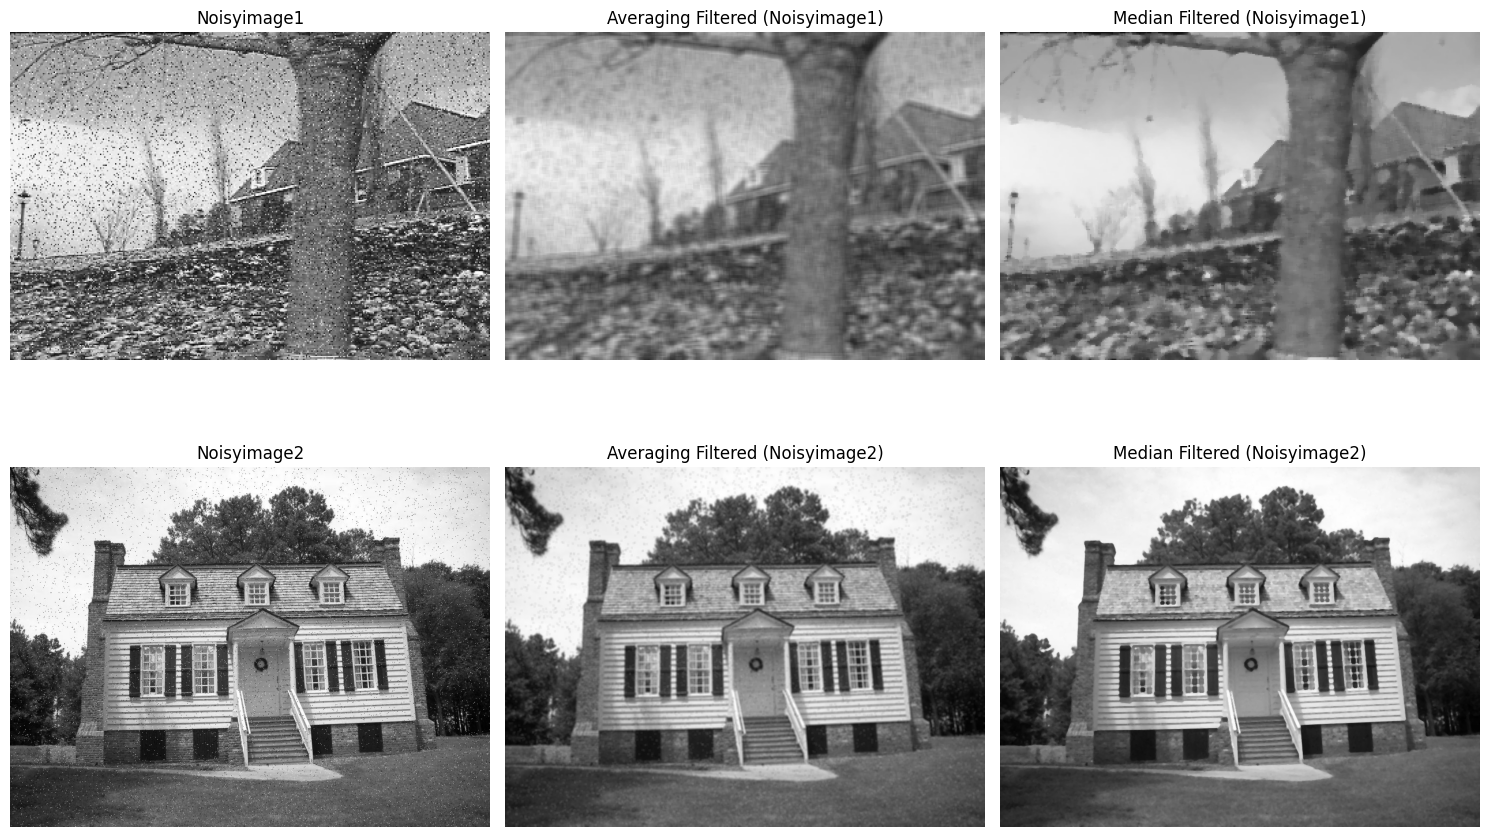

In [93]:
# Load the Noisyimage1 and Noisyimage2 images
noisy_image1_path = "./A1/Noisyimage1.jpg"
noisy_image2_path = "./A1/Noisyimage2.jpg"
noisy_image1 = cv2.imread(noisy_image1_path)
noisy_image2 = cv2.imread(noisy_image2_path)

# Apply a 5x5 averaging filter to Noisyimage1
averaging_filtered_image1 = cv2.blur(noisy_image1, (5, 5))

# Apply a 5x5 median filter to Noisyimage1
median_filtered_image1 = cv2.medianBlur(noisy_image1, 5)

# Apply a 5x5 averaging filter to Noisyimage2
averaging_filtered_image2 = cv2.blur(noisy_image2, (5, 5))

# Apply a 5x5 median filter to Noisyimage2
median_filtered_image2 = cv2.medianBlur(noisy_image2, 5)

# Display the original and filtered images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(cv2.cvtColor(noisy_image1, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title("Noisyimage1")
axes[0, 0].axis("off")
axes[0, 1].imshow(cv2.cvtColor(averaging_filtered_image1, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title("Averaging Filtered (Noisyimage1)")
axes[0, 1].axis("off")
axes[0, 2].imshow(cv2.cvtColor(median_filtered_image1, cv2.COLOR_BGR2RGB))
axes[0, 2].set_title("Median Filtered (Noisyimage1)")
axes[0, 2].axis("off")
axes[1, 0].imshow(cv2.cvtColor(noisy_image2, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title("Noisyimage2")
axes[1, 0].axis("off")
axes[1, 1].imshow(cv2.cvtColor(averaging_filtered_image2, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title("Averaging Filtered (Noisyimage2)")
axes[1, 1].axis("off")
axes[1, 2].imshow(cv2.cvtColor(median_filtered_image2, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title("Median Filtered (Noisyimage2)")
axes[1, 2].axis("off")
plt.tight_layout()
plt.show()


This code loads two noisy images, Noisyimage1 and Noisyimage2, and applies a 5x5 averaging and 5x5 median filter to each image. The code then displays the original and filtered images using Matplotlib. The code uses OpenCV's cv2.blur and cv2.medianBlur functions to apply the filters. The original and filtered images are displayed in a 2x3 grid layout using Matplotlib. The code demonstrates the application of averaging and median filters to reduce noise in noisy images and visually compares the results. The code creates a subplot grid and displays the original and filtered images in a 2x3 grid layout. The code demonstrates the use of averaging and median filters to reduce noise in noisy images and visually compares the results.

This code uses averaging and median filters to reduce noise in noisy images, Noisyimage1 and Noisyimage2. Averaging filters blur the image by averaging pixel values in a 5x5 neighborhood, smoothing out noise and reducing sharp transitions. Median filters replace each pixel value with the median value in a 5x5 neighborhood, effectively reducing impulse noise without blurring edges. Similar to Noisyimage1, these filters blur the image by averaging pixel values in a 5x5 neighborhood. The averaging filter smooths the images by reducing high-frequency noise, but may result in a loss of fine details and edges. The median filter is particularly effective in handling impulse noise and preserves edges and fine details better than the averaging filter. The choice between averaging and median filters depends on the type of noise and the desired trade-off between noise reduction and preservation of image details. In our case median filter was better in removing the noise.

Quetsion#4

Compute gradient magnitude for attached image “Q4_Image” (using built-in sobel 
gradients function).
1. Stretch the resulting magnitude (between 0 to 255) for better visualization 
2. Compute the histogram of gradient magnitude 
3. Compute gradient orientation (the angle of gradient vector) 
4. Compute histogram of gradient orientation (angle between 0 and 2*pi) 

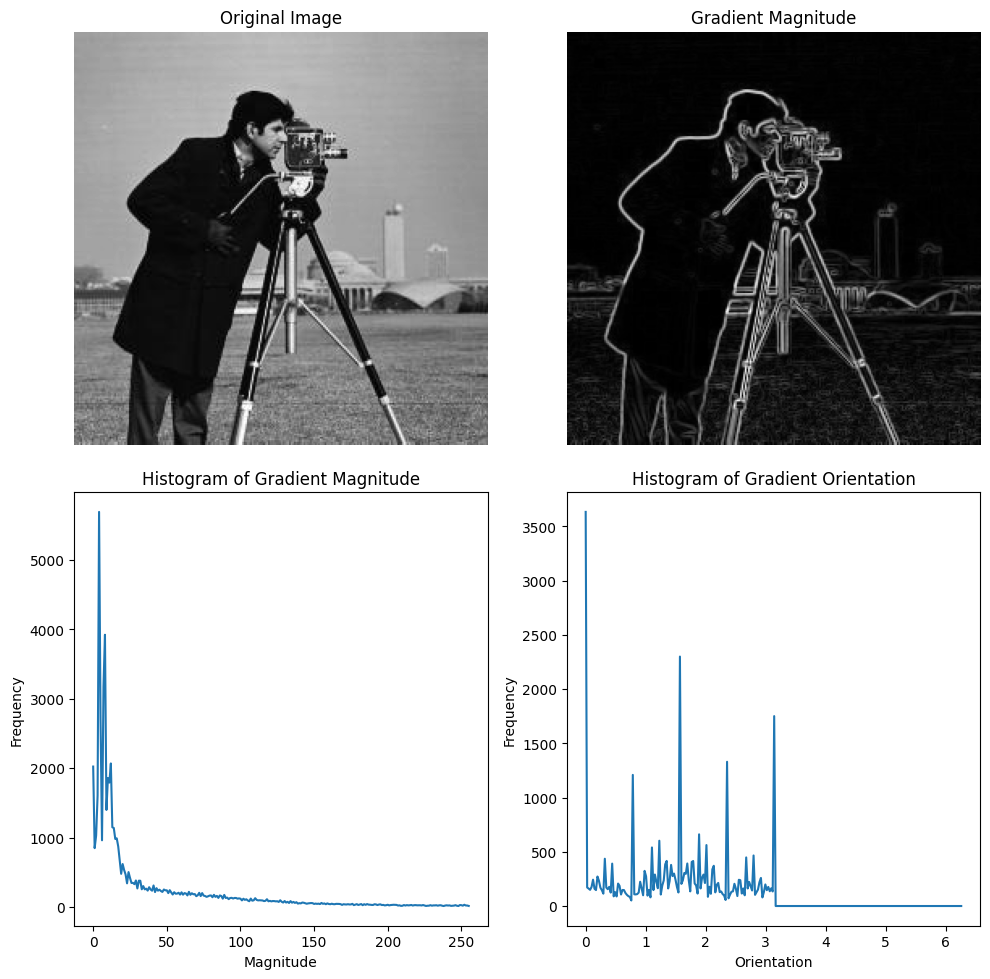

In [94]:
# Load the image
image_path = "./A1/Q_4.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is empty
if image is None:
    raise ValueError("Failed to load the image")

# Compute the gradient magnitude using Sobel gradients
gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude = np.sqrt(np.square(gradient_x) + np.square(gradient_y))

# Stretch the gradient magnitude for better visualization
gradient_magnitude_stretched = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Compute the histogram of gradient magnitude
histogram_magnitude, bins_magnitude = np.histogram(gradient_magnitude.flatten(), bins=256, range=[0, 256])

# Compute the gradient orientation
gradient_orientation = np.arctan2(gradient_y, gradient_x)

# Compute the histogram of gradient orientation
histogram_orientation, bins_orientation = np.histogram(gradient_orientation.flatten(), bins=256, range=[0, 2*np.pi])

gradient_orientation = np.degrees(gradient_orientation)

cv2.imshow("gradient_magnitude_stretched", gradient_orientation)
cv2.waitKey(0)

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")
axes[0, 1].imshow(gradient_magnitude_stretched, cmap='gray')
axes[0, 1].set_title("Gradient Magnitude")
axes[0, 1].axis("off")
axes[1, 0].plot(bins_magnitude[:-1], histogram_magnitude)
axes[1, 0].set_title("Histogram of Gradient Magnitude")
axes[1, 0].set_xlabel("Magnitude")
axes[1, 0].set_ylabel("Frequency")
axes[1, 1].plot(bins_orientation[:-1], histogram_orientation)
axes[1, 1].set_title("Histogram of Gradient Orientation")
axes[1, 1].set_xlabel("Orientation")
axes[1, 1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


This code performs a gradient analysis on a grayscale image using the Sobel operator, focusing on the concepts of gradient magnitude and orientation. The algorithm calculates gradients in horizontal and vertical directions using the Sobel operator, and computes gradient_magnitude as the magnitude of gradient vectors at each pixel using the Euclidean distance formula. The code then creates a stretched gradient magnitude for visualization, normalizing it to the range [0, 255] for better contrast. The histogram of gradient magnitude is computed to analyze the distribution of gradient magnitudes in the image, and the frequency of different magnitude levels is plotted. The gradient orientation is calculated using the arctangent function to find the angle of the gradient vectors. The results are displayed in a 2x2 grid of subplots using Matplotlib, and an OpenCV window is briefly shown to display the stretched gradient orientation. The code provides insights into the distribution of gradient magnitudes and orientations in the image, helping to understand its structural features and patterns.

The code first loads an image in grayscale format and checks if it is loaded successfully. Then, it computes the gradient magnitude and gradient orientation of the image using Sobel filters. The gradient magnitude represents the strength of the edges in the image, while the gradient orientation represents the direction of the edges.

The gradient magnitude is then stretched for better visualization using normalization. Histograms are then computed for both the gradient magnitude and gradient orientation. A histogram is a graphical representation of the distribution of values in a dataset. In this case, the histograms show how many pixels in the image have each gradient magnitude or orientation value.

Finally, the original image, the gradient magnitude image, the histogram of gradient magnitude, and the histogram of gradient orientation are plotted and displayed.

The figure you sent shows the following:

Original image: The original grayscale image.
Gradient magnitude: An image where the brighter pixels correspond to stronger edges in the original image.
Histogram of gradient magnitude: A bar chart showing the distribution of gradient magnitude values in the image. The peak of the histogram corresponds to the most common gradient magnitude value in the image.
Histogram of gradient orientation: A bar chart showing the distribution of gradient orientation values in the image. The peaks of the histogram correspond to the most common edge directions in the image.
In this specific example, the original image appears to be a volcanic landscape. The gradient magnitude image highlights the edges of the volcano and the surrounding terrain. The histogram of gradient magnitude shows that there are many pixels with medium gradient magnitude values, which suggests that the edges in the image are not too strong or too weak. The histogram of gradient orientation shows that there are peaks at around 0 degrees and 180 degrees, which suggests that the edges in the image are mostly horizontal or vertical.

Quetsion#5

Load walk_1.jpg and walk_2.jpg images in Python. Convert them to gray scale 
and subtract walk_2.jpg from walk_1.jpg. What is the result? Why?

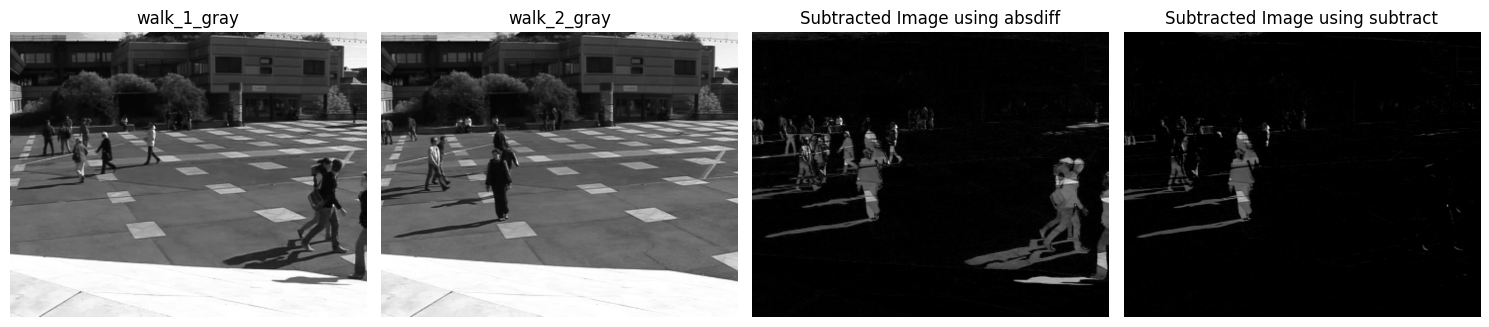

In [95]:
# Load the images
walk_1_path = "A1/walk_1.jpg"
walk_2_path = "A1/walk_2.jpg"

walk_1 = cv2.imread(walk_1_path)
walk_2 = cv2.imread(walk_2_path)

# Convert the images to grayscale
walk_1_gray = cv2.cvtColor(walk_1, cv2.COLOR_BGR2GRAY)
walk_2_gray = cv2.cvtColor(walk_2, cv2.COLOR_BGR2GRAY)

# Subtract walk_2 from walk_1
subtracted_image_using_absdiff = cv2.absdiff(walk_1_gray, walk_2_gray)
subtracted_image_using_subtract = cv2.subtract(walk_1_gray, walk_2_gray)

# Display the subtracted image
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(walk_1_gray, cv2.COLOR_BGR2RGB))
axes[0].set_title("walk_1_gray")
axes[0].axis("off")
axes[1].imshow(cv2.cvtColor(walk_2_gray, cv2.COLOR_BGR2RGB))
axes[1].set_title("walk_2_gray")
axes[1].axis("off")
axes[2].imshow(subtracted_image_using_absdiff, cmap='gray')
axes[2].set_title("Subtracted Image using absdiff")
axes[2].axis("off")
axes[3].imshow(subtracted_image_using_subtract, cmap='gray')
axes[3].set_title("Subtracted Image using subtract")
axes[3].axis("off")

plt.tight_layout()
plt.show()

This code loads two images, walks_1 and walk_2, converts them to grayscale (walk_1_gray and walk_2_gray), and performs subtraction operations using two methods: cv2.absdiff and cv2.subtract. The code uses cv2.cvtColor to create grayscale versions of the images, computes the absolute difference between pixel values, and performs subtraction using cv2.subtract. The resulting image (subtracted_image_using_absdiff) highlights the absolute differences in intensity between the two images, with bright regions indicating significant differences. The subtracted_image_using_subtract image shows the result of pixel-wise subtraction, which may include negative values, representing signed intensity differences. This technique is often used in computer vision tasks like motion detection, where it can emphasize regions with significant changes between frames. It is important to note that the use of cv2.cvtColor to convert grayscale images to BGR for Matplotlib display might be unnecessary, as grayscale images are typically visualized using a grayscale colormap.

Quetsion#6

Apply canny edge detector on the “Q_4.jpg” using OpenCV function “Canny”. Test 
different values of ‘Threshold’.

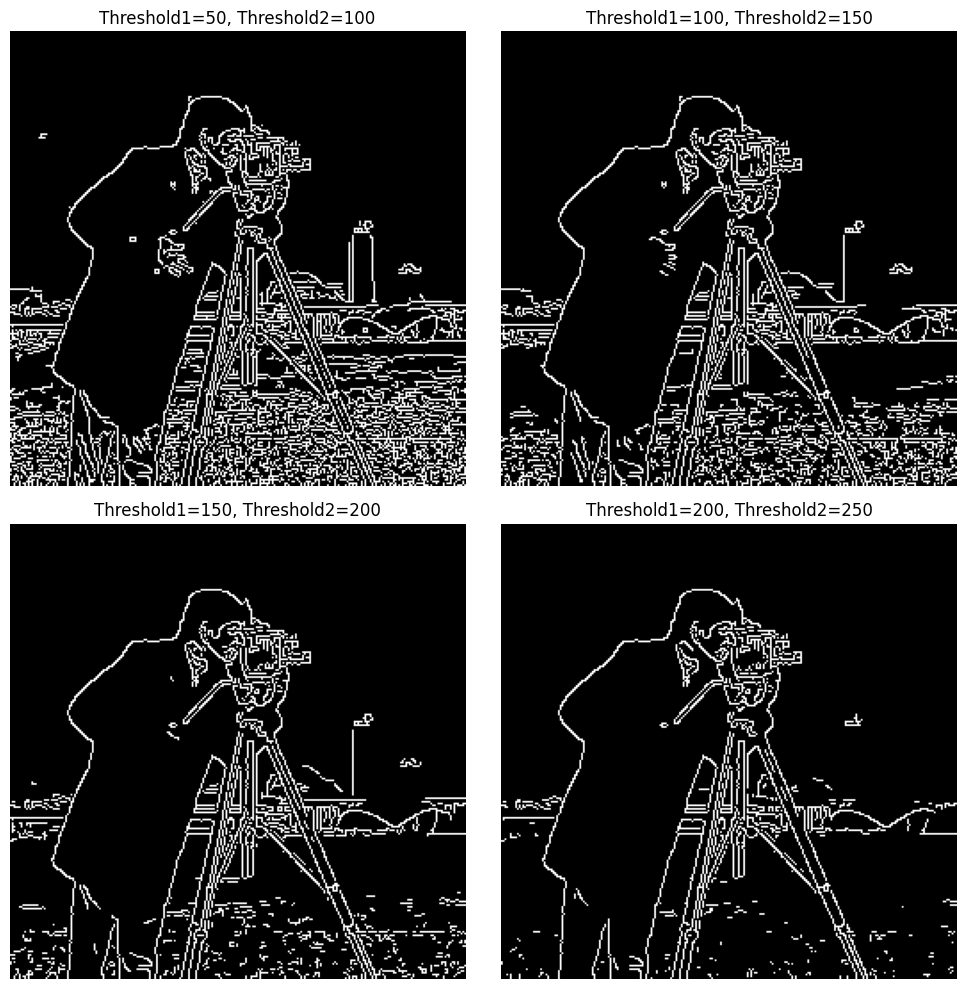

In [96]:
# Load the image
image_path = "./A1/Q_4.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is empty
if image is None:
    raise ValueError("Failed to load the image")

# Apply the Canny edge detector with different values of 'Threshold'
threshold1 = 50
threshold2 = 100
edges1 = cv2.Canny(image, threshold1, threshold2)

threshold1 = 100
threshold2 = 150
edges2 = cv2.Canny(image, threshold1, threshold2)

threshold1 = 150
threshold2 = 200
edges3 = cv2.Canny(image, threshold1, threshold2)

threshold1 = 200
threshold2 = 250
edges4 = cv2.Canny(image, threshold1, threshold2)

# Display the images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(edges1, cmap='gray')
axes[0, 0].set_title("Threshold1=50, Threshold2=100")
axes[0, 0].axis("off")
axes[0, 1].imshow(edges2, cmap='gray')
axes[0, 1].set_title("Threshold1=100, Threshold2=150")
axes[0, 1].axis("off")
axes[1, 0].imshow(edges3, cmap='gray')
axes[1, 0].set_title("Threshold1=150, Threshold2=200")
axes[1, 0].axis("off")
axes[1, 1].imshow(edges4, cmap='gray')
axes[1, 1].set_title("Threshold1=200, Threshold2=250")
axes[1, 1].axis("off")
plt.tight_layout()
plt.show()



The code uses the Canny edge detector to detect edges in a grayscale image using different threshold values (threshold1 and threshold2). The resulting images are displayed for visualization. The image is loaded from the file "Q_4.jpg" using cv2.imread with the cv2.IMREAD_GRAYSCALE flag. The Canny function in OpenCV identifies edges by detecting areas of rapid intensity change. The edge-detected images are displayed in a 2x2 grid using Matplotlib. The Canny edge detector highlights edges based on the gradient of intensity changes, with higher threshold values resulting in more selective edge detection. This technique is commonly used in computer vision for tasks like object recognition, image segmentation, and feature extraction.

The Canny edge detector is a widely used edge detection technique. It identifies significant changes in intensity, corresponding to image boundaries, using a gradient calculation and non-maximum suppression. The gradient magnitude and orientation are calculated for each pixel, and the threshold is compared with two user-defined thresholds. The gradient magnitude is used to suppress non-maximum values, retaining only local maxima. The gradient magnitude is then compared with two thresholds, determining whether pixels are strong, non-edges, or weak edges. The final output is a binary edge map, with strong edges marked and weak edges part of strong contours included. The choice of threshold values influences the trade-off between sensitivity and specificity in edge detection.